# Classificação de Estágios da Doença de Alzheimer

## Preparação de dados

### Bibliotecas

In [1]:
import os
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil
from PIL import Image

### Variáveis iniciais

In [2]:
# Nome do dataset no Kaggle
kaggle_dataset = "marcopinamonti/alzheimer-mri-4-classes-dataset"

# Local do dataset compactado (opcional)
archive_file = "./archive/alzheimer-mri-4-classes-dataset.zip"

# Pasta de dados
dest_folder = "./data"

# Pasta do dataset
dataset_folder = "./data/Alzheimer_MRI_4_classes_dataset"

### Descompacta o dataset se disponível o arquivo local

In [3]:
# Descompacta o dataset se o arquivo local existir
if os.path.exists(archive_file) and not os.path.exists(dataset_folder):

    print("Arquivo encontrado:", archive_file)

    with zipfile.ZipFile(archive_file, 'r') as zip_ref:
        zip_ref.extractall(dest_folder)

    print("Dataset descompactado em:", dest_folder)

### Baixa o dataset do Kaggle se não encontrado o arquivo local

É necessário seguir os passos aqui [Getting Started: Installation & Authentication](https://www.kaggle.com/docs/api#authentication) para preparar seu ambiente e baixar o dataset diretamente, um resumo está abaixo:

- Passo 1

    Instale as bibliotecas Kaggle
    ```bash
    pip install kaggle kagglehub
    ```

- Passo 2

    Logue no site e vá em *Perfil > Settings > API > Create new token*, um arquivo *kaggle.json* será baixado

- Passo 3

  Coloque o arquivo *kaggle.json* em *~/.kaggle/kaggle.json* no Linux / OSX, ou em *C:\Users\<username>\.kaggle\kaggle.json* no Windows

In [4]:
# Baixa o dataset do Kaggle se não existir o arquivo local
if not os.path.exists(archive_file) and not os.path.exists(dataset_folder):

    print("Arquivo não encontrado:", archive_file)

    import kagglehub
    local_download_path = kagglehub.dataset_download(kaggle_dataset)
    print("Dataset baixado em:", local_download_path)

    os.makedirs(dest_folder, exist_ok=True)

    # Mover o conteúdo da pasta
    for item in os.listdir(local_download_path):
        s = os.path.join(local_download_path, item)
        d = os.path.join(dest_folder, item)
        shutil.move(s, d)

    print("Dataset movido para:", dest_folder)

### Verificar pastas

In [5]:
if not os.path.exists(dataset_folder):
    print("Pasta não encontrada:", dataset_folder)
else:
    print("Pasta encontrada:", dataset_folder)

# Lista de pastas a serem verificadas
folders = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

# Verifica se as pastas existem no dataset
for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    if not os.path.exists(folder_path):
        print("Pasta não encontrada:", folder_path)
    else:
        print("Pasta encontrada:", folder_path)

Pasta encontrada: ./data/Alzheimer_MRI_4_classes_dataset
Pasta encontrada: ./data/Alzheimer_MRI_4_classes_dataset\MildDemented
Pasta encontrada: ./data/Alzheimer_MRI_4_classes_dataset\ModerateDemented
Pasta encontrada: ./data/Alzheimer_MRI_4_classes_dataset\NonDemented
Pasta encontrada: ./data/Alzheimer_MRI_4_classes_dataset\VeryMildDemented


### Verificar imagens

In [10]:
# Função para exibir imagens
def show_random_images(folder_path, num_images=4):
    images = os.listdir(folder_path)
    random_images = random.sample(images, num_images)
    plt.figure(figsize=(6, 3))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")  # Convertendo para RGB para exibir corretamente
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')
    plt.show()

Exibindo imagens da pasta: MildDemented
./data/Alzheimer_MRI_4_classes_dataset\MildDemented
Total de imagens na pasta: 896


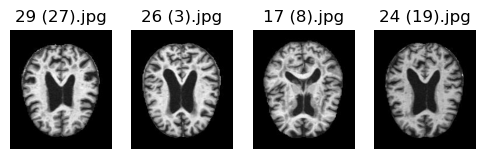

Exibindo imagens da pasta: ModerateDemented
./data/Alzheimer_MRI_4_classes_dataset\ModerateDemented
Total de imagens na pasta: 64


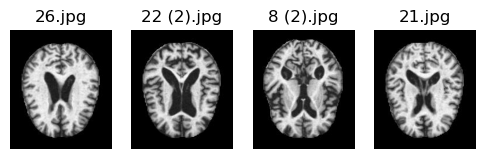

Exibindo imagens da pasta: NonDemented
./data/Alzheimer_MRI_4_classes_dataset\NonDemented
Total de imagens na pasta: 3200


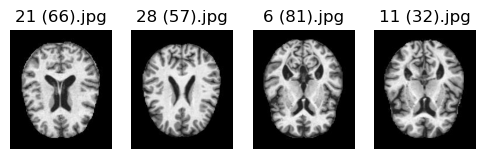

Exibindo imagens da pasta: VeryMildDemented
./data/Alzheimer_MRI_4_classes_dataset\VeryMildDemented
Total de imagens na pasta: 2240


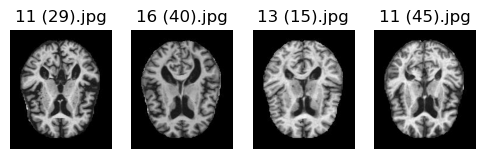

In [11]:
# Exibir 4 imagens aleatórias de cada pasta
for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    if os.path.exists(folder_path):
        print(f"Exibindo imagens da pasta: {folder}")
        print(f"{folder_path}")
        print(f"Total de imagens na pasta: {len(os.listdir(folder_path))}")
        show_random_images(folder_path)
    else:
        print(f"Pasta não encontrada: {folder}\n{folder_path}")